Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.39      0.43       527
           1       0.64      0.73      0.68       779

    accuracy                           0.59      1306
   macro avg       0.56      0.56      0.56      1306
weighted avg       0.58      0.59      0.58      1306

Confusion Matrix:
 [[205 322]
 [212 567]]


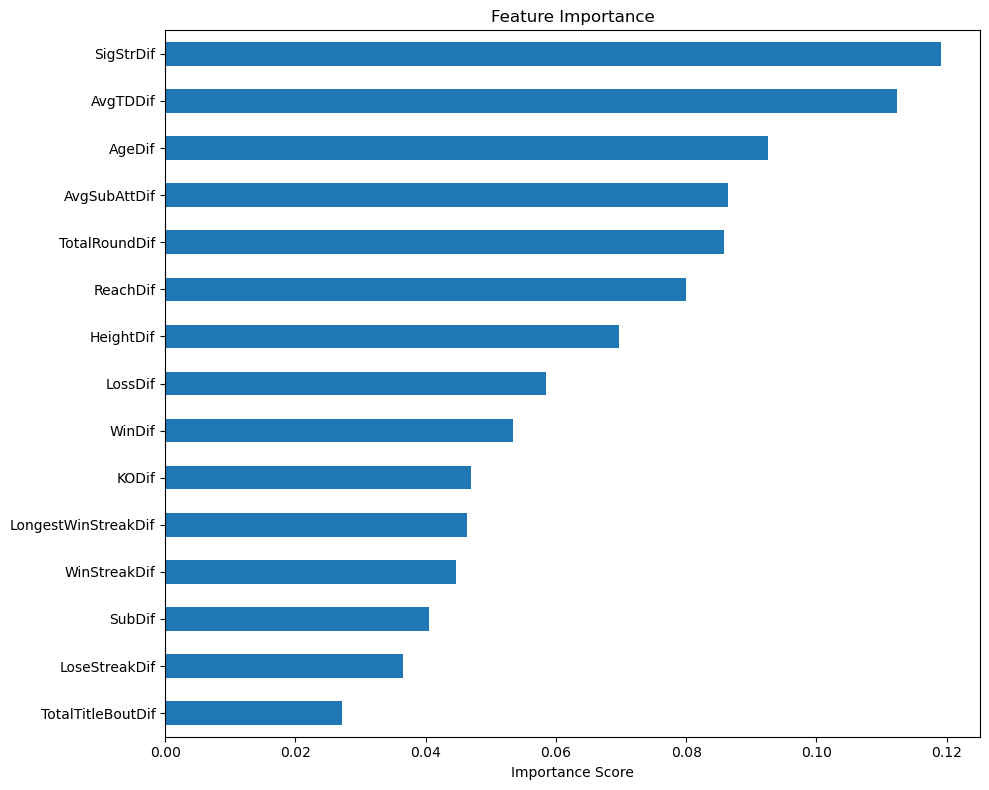

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#For the PC
#df = pd.read_csv(r'C:\Users\Ray\Downloads\ufc-master.csv')
#For the Mac
df = pd.read_csv('/Users/rayreyes/Library/CloudStorage/OneDrive-GettysburgCollege/Data science 325/Project/ufc-master.csv')

# Filter to only fights with a clear winner
df = df[df['Winner'].isin(['Red', 'Blue'])]

# Create binary target variable: 1 if Red wins, 0 if Blue wins
df['WinnerBinary'] = df['Winner'].apply(lambda x: 1 if x == 'Red' else 0)

# Define feature columns to use (differences between fighters)
feature_cols = [
    'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif',
    'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif',
    'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif'
]

# Drop rows with missing values in those columns
df_model = df[feature_cols + ['WinnerBinary']].dropna()

# Split into features and target
X = df_model[feature_cols]
y = df_model['WinnerBinary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance plot
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=True)
plt.figure(figsize=(10, 8))
importances.plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load datasets
# For the PC
#fighter_stats_df = pd.read_csv(r"C:\Users\Ray\OneDrive - Gettysburg College\Data science 325\Project\fighter_stats.csv")
#df_fights = pd.read_csv(r"C:\Users\Ray\OneDrive - Gettysburg College\Data science 325\Project\ufc-master.csv")
# For the Mac
fighter_stats_df = pd.read_csv('/Users/rayreyes/Library/CloudStorage/OneDrive-GettysburgCollege/Data science 325/Project/fighter_stats.csv')
df_fights = pd.read_csv('/Users/rayreyes/Library/CloudStorage/OneDrive-GettysburgCollege/Data science 325/Project/ufc-master.csv')

# Clean fight data and create target variable
df_fights = df_fights[df_fights['Winner'].isin(['Red', 'Blue'])]
df_fights['WinnerBinary'] = df_fights['Winner'].apply(lambda x: 1 if x == 'Red' else 0)

# Select features
feature_cols = [
    'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif',
    'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif',
    'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif'
]

# Drop missing values
df_model = df_fights[feature_cols + ['WinnerBinary']].dropna()
X = df_model[feature_cols]
y = df_model['WinnerBinary']

# Train/test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
print(classification_report(y_test, rf_model.predict(X_test)))

# Prediction function
def predict_fight(fighter_name_a, fighter_name_b):
    fighter_a = fighter_stats_df[fighter_stats_df['name'].str.lower() == fighter_name_a.lower()]
    fighter_b = fighter_stats_df[fighter_stats_df['name'].str.lower() == fighter_name_b.lower()]

    if fighter_a.empty or fighter_b.empty:
        print("One or both fighters not found.")
        return

    fighter_a = fighter_a.iloc[0]
    fighter_b = fighter_b.iloc[0]

    input_features = {
        'LoseStreakDif': 0,
        'WinStreakDif': 0,
        'LongestWinStreakDif': 0,
        'WinDif': fighter_a['wins'] - fighter_b['wins'],
        'LossDif': fighter_a['losses'] - fighter_b['losses'],
        'TotalRoundDif': 0,
        'TotalTitleBoutDif': 0,
        'KODif': 0,
        'SubDif': 0,
        'HeightDif': fighter_a['height'] - fighter_b['height'],
        'ReachDif': fighter_a['reach'] - fighter_b['reach'],
        'AgeDif': fighter_a['age'] - fighter_b['age'],
        'SigStrDif': fighter_a['SLpM'] - fighter_b['SLpM'],
        'AvgSubAttDif': fighter_a['sub_avg'] - fighter_b['sub_avg'],
        'AvgTDDif': fighter_a['td_avg'] - fighter_b['td_avg']
    }

    input_df = pd.DataFrame([input_features])
    prediction = rf_model.predict(input_df)[0]
    probabilities = rf_model.predict_proba(input_df)[0]

    predicted_winner = fighter_name_a if prediction == 1 else fighter_name_b
    print(f"Predicted Winner: {predicted_winner}")
    print(f"Win Probabilities: {fighter_name_a}: {probabilities[1]:.2f}, {fighter_name_b}: {probabilities[0]:.2f}")

# The Fun Part
predict_fight("Alexander Volkanovski", "Diego Lopes")


              precision    recall  f1-score   support

           0       0.49      0.39      0.43       527
           1       0.64      0.73      0.68       779

    accuracy                           0.59      1306
   macro avg       0.56      0.56      0.56      1306
weighted avg       0.58      0.59      0.58      1306

Predicted Winner: Alexander Volkanovski
Win Probabilities: Alexander Volkanovski: 0.56, Diego Lopes: 0.44
